            Site Id   Time  WTEQ.I-1 (in)   PREC.I-1 (in)   TOBS.I-1 (degC)   \
Date                                                                           
2005-01-01      415  00:00             5.2             5.8              -2.1   
2005-01-01      415  03:00             5.2             6.0              -4.2   
2005-01-02      415  00:00             5.1             5.8             -11.2   
2005-01-02      415  03:00             5.1             5.8             -11.9   
2005-01-03      415  00:00             5.1             5.9              -8.9   

            SNWD.I-1 (in)   Unnamed: 7  
Date                                    
2005-01-01           -99.9         NaN  
2005-01-01           -99.9         NaN  
2005-01-02           -99.9         NaN  
2005-01-02           -99.9         NaN  
2005-01-03           -99.9         NaN  
Index(['Site Id', 'Time', 'WTEQ.I-1 (in) ', 'PREC.I-1 (in) ',
       'TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', 'Unnamed: 7'],
      dtype='object')
<class '

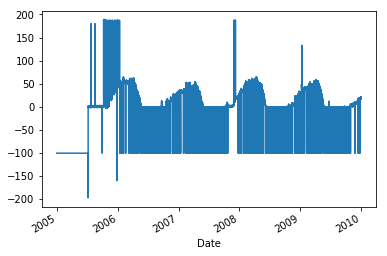

count    37019.000000
mean         2.575953
std         50.394062
min       -196.000000
25%         -1.000000
50%          7.000000
75%         39.000000
max        189.000000
Name: SNWD.I-1 (in) , dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


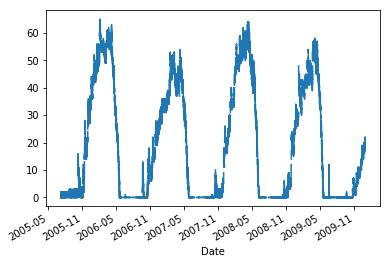

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37019 entries, 2005-01-01 to 2009-12-31
Data columns (total 7 columns):
Site Id             37019 non-null int64
Time                37019 non-null object
WTEQ.I-1 (in)       37019 non-null float64
PREC.I-1 (in)       37019 non-null float64
TOBS.I-1 (degC)     37019 non-null float64
SNWD.I-1 (in)       27543 non-null float64
Unnamed: 7          0 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ MB
None
count    27543.000000
mean        25.202120
std         20.708747
min          0.000000
25%          2.000000
50%         26.000000
75%         44.000000
max         65.000000
Name: SNWD.I-1 (in) , dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import datetime as dt


#import raw snotel data
snotel_files = glob(r'C:\Users\RAPP\Desktop\SPringboard Intermediate Python\SNOTEL\415_STAND_YEAR=200*.csv')

parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d') #Dates aren't in a form python recognizes

snotel_data = [pd.read_csv(f, header=1, date_parser=parser, index_col='Date') for f in snotel_files]

snotel_df= pd.concat(snotel_data)

#Look at Raw data stats
print(snotel_df.head())
print(snotel_df.keys())
print(snotel_df.info())
print(snotel_df.describe())


#SNWD data info------

#plot raw data
snotel_df['SNWD.I-1 (in) '].plot()
plt.show()
print(snotel_df['SNWD.I-1 (in) '].describe())

#set outliers to Nan
x=(snotel_df['SNWD.I-1 (in) ']<0) | (snotel_df['SNWD.I-1 (in) ']>100) 
snotel_df['SNWD.I-1 (in) '][x]=np.NaN
snotel_df['SNWD.I-1 (in) '].plot()

plt.show()

#print new stats for snwd
print(snotel_df.info())
print(snotel_df['SNWD.I-1 (in) '].describe())


